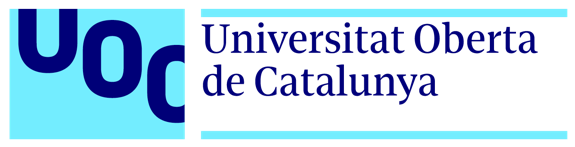

# TFM - Aprendizaje automático para la predicción del riesgo individual de cáncer de mama dentro del programa de cribado. Comparativa frente a modelo estadístico.

1. Load data

2. Variable introduction

3. Basic data analysis

4. Data descriptive analysis

5. Data visualization

#### Load libraries to be used

In [2]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D

import warnings
warnings.filterwarnings('ignore')

# 1. Data

In [3]:
# Load the original data file with all the samples
file_path = "./data/DataBase.dat"
data = pd.read_csv(file_path, delim_whitespace = True)

# Show first five samples
data.head(5)

,ID,Episode_ID,Age,Time1,Time2,Timetotal,Family_History,BBD_History,Mammographic_Features,BreastCancer
0,1,1,56,",00","2,23","13,96",0,0,0,0
1,1,2,58,"2,23","4,01","13,96",0,1,0,0
2,1,3,60,"4,01","5,95","13,96",0,1,0,0
3,1,4,62,"5,95","7,98","13,96",0,1,0,0
4,1,5,64,"7,98","10,13","13,96",0,1,0,0


## 1.1 Variable description

Descripción de las variables que conforman el dataset:


- `ID`: variable identificativa para cada mujer
- `Episode_ID`: identificador asociado al episodio (mamografía) de cada mujer, ordenados cronológicamente
- `Age`: edad de la mujer
- `Time1`:
- `Time2`:
- `Timetotal`:
- `Family_History`: historia familiar de antecedentes de cáncer de mama (familiar de primer grado)
    - 0: No hay antecedentes
    - 1: Si
- `BBD_History`: antecedentes personales de lesión benigna
    - 0: Ninguno
    - 1: Biopsia previa, histología desconocida (reportada por la propio mujer a traves de cuestionario)
    - 2: Biopsia previa, tipo no proliferativa (confirmada histológicamente, reportada durante cribado)
    - 3: Biopsia previa, tipo proliferativa (confirmada histológicamente, reportada durante cribado)
- `Mammographic_Features`: antecedentes personales de patrones mamográficos (reportados por un radiólogo en mamografías anteriores)
    - 0: Ninguna
    - 1: Masa
    - 2: Calcificaciones
    - 3: Densidad asimétrica
    - 4: Distorsión
    - 5: Patrón múltipla
- `BreastCancer`:
    - 0: No
    - 1: Si

## 1.2 Data transformation

In [4]:
df = data
df = df.drop(["ID"], axis = 1)
df[df["Time1"] == ",00"] = "0"
df["Time1"] = data["Time1"].str.replace(",",".")
df["Time1"] = df["Time1"].astype(str).astype(float).astype(int)
df["Time2"] = data["Time2"].str.replace(",",".")
df["Time2"] = df["Time2"].astype(str).astype(float).astype(int)
df["Timetotal"] = data["Timetotal"].str.replace(",",".")
df["Timetotal"] = df["Timetotal"].astype(str).astype(float).astype(int)
df["Episode_ID"] = df["Episode_ID"].astype("category")
df["Age"] = df["Age"].astype(int)
df["Family_History"] = df["Family_History"].astype("category")
df["BBD_History"] = df["BBD_History"].astype("category")
df["Mammographic_Features"] = df["Mammographic_Features"].astype("category")
df["BreastCancer"] = df["BreastCancer"].astype("category")

# 2. Data analysis

## 2.1 Variable composition analysis

In [5]:
print("The dataset has " + str(data.shape[0]) + " samples")
print("The dataset has " + str(data.shape[1]) + " variables")

The dataset has 437540 samples
The dataset has 10 variables


In [6]:
# Group dataset by ID
df_total = data.groupby(['ID']).agg(list)
df_cancer_free = data[data['BreastCancer'] == 0].groupby(['ID']).agg(list)
df_cancer = data[data['BreastCancer'] == 1].groupby(['ID']).agg(list)

In [7]:
print("The dataset samples belong to " + str(df_total.shape[0]) + " women")
print("The dataset has " + str(df_cancer_free.shape[0]) + " women that haven't developed breast cancer")
print("The dataset has " + str(df_cancer.shape[0]) + " women that have developed breast cancer")

The dataset samples belong to 121969 women
The dataset has 119911 women that haven't developed breast cancer
The dataset has 2058 women that have developed breast cancer


In [8]:
df_mean_total = data.groupby(["ID"]).mean()
df_mean_cancer_free = data[data['BreastCancer'] == 0].groupby(["ID"]).mean()
df_mean_cancer = data[data['BreastCancer'] == 1].groupby(["ID"]).mean()

In [9]:
print("Mean age total dataset women: "
      "{:.2f}".format(df_mean_total.describe()["Age"]["mean"]))
print("Mean age women that haven't developed breast cancer: "
      "{:.2f}".format(df_mean_cancer_free.describe()["Age"]["mean"]))
print("Mean age women that have developed breast cancer: "
      "{:.2f}".format(df_mean_cancer.describe()["Age"]["mean"]))

Mean age total dataset women: 58.24
Mean age women that haven't developed breast cancer: 58.27
Mean age women that have developed breast cancer: 56.76


In [10]:
print("Mean episodes total dataset women:"
      "{:.2f}".format(df_mean_total.describe()["Episode_ID"]["mean"]))
print("Mean episodes women that haven't developed breast cancer: "
      "{:.2f}".format(df_mean_cancer_free.describe()["Episode_ID"]["mean"]))
print("Mean episodes women that have developed breast cancer: "
      "{:.2f}".format(df_mean_cancer.describe()["Episode_ID"]["mean"]))

Mean episodes total dataset women:2.29
Mean episodes women that haven't developed breast cancer: 2.30
Mean episodes women that have developed breast cancer: 1.97


- Que visualizaciones puedo mostrar

    - Edad media de las mujeres total
    - Edad media de las mujeres sin cáncer
    - Edad media de las mujeres con cáncer
    - Distribución de las variables numéricas (histograma)
    - Visualización yes vs no
    

## 2.2 Variable types analysis

### 2.2.1 Numerical data

In [11]:
# Descriptive analysis
df.drop(["Episode_ID", "Family_History", "BBD_History", "Mammographic_Features", "BreastCancer"], axis = 1).describe()

,Age,Time1,Time2,Timetotal
count,437540.000000,437540.000000,437540.000000,437540.000000
mean,43.545552,3.793034,5.795004,9.871321
std,27.396364,3.818791,3.932821,4.447056
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,6.000000
50%,57.000000,3.000000,5.000000,10.000000
75%,63.000000,6.000000,8.000000,13.000000
max,69.000000,18.000000,20.000000,20.000000


[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


Text(0.5, 1.0, 'Timetotal')

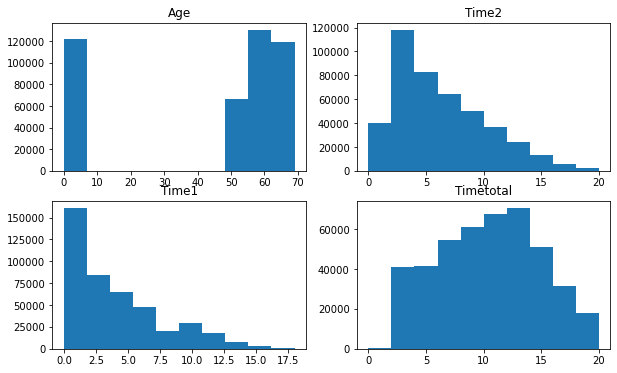

In [12]:
# Histograms
fig, ax = plt.subplots(2, 2, figsize = (10, 6))
print(ax)
ax[0, 0].hist(df["Age"]) # ??????WEIRD
ax[1, 0].hist(df["Time1"])
ax[0, 1].hist(df["Time2"])
ax[1, 1].hist(df["Timetotal"])


ax[0, 0].set_title("Age")
ax[1, 0].set_title("Time1")
ax[0, 1].set_title("Time2")
ax[1, 1].set_title("Timetotal")

### 2.2.2 Categorical data

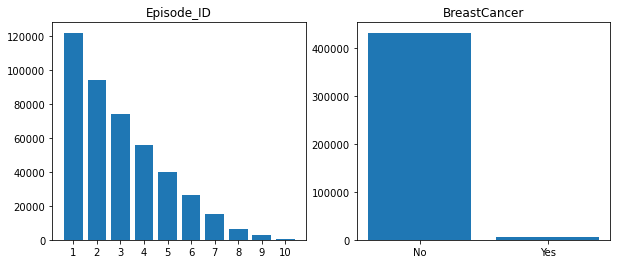

In [52]:
features = data[["Episode_ID", "BreastCancer"]].columns

fig, axis = plt.subplots(1, len(features), figsize=(10, 4))
for feature, ax in zip(features, axis):
    freq = data[feature].value_counts()
    ax.bar(freq.index.values, freq)
    ax.set_title(feature)
    
    if (feature == "Episode_ID"):
        ax.set_xticks(freq.index.values, ("1", "2", "3", "4", "5", "6", "7", "8", "9", "10"))
    else:
        ax.set_xticks(freq.index.values, ("No", "Yes"))

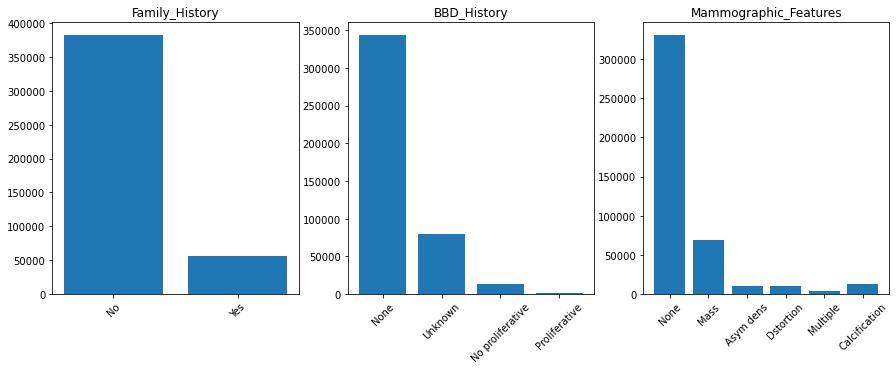

In [56]:
features = data[["Family_History", "BBD_History", "Mammographic_Features"]].columns

fig, axis = plt.subplots(1, len(features), figsize=(15, 5))
for feature, ax in zip(features, axis):
    freq = data[feature].value_counts()
    ax.bar(freq.index.values, freq)
    ax.set_title(feature)
    
    if (feature == "BBD_History"):
        ax.set_xticks(freq.index.values, ("None", "Unknown", "No proliferative", "Proliferative"), rotation=45)
    elif (feature == "Mammographic_Features"):
        ax.set_xticks(freq.index.values, ("None", "Mass", "Calcification", "Asym dens", "Dstortion", "Multiple"),
                     rotation=45)
    else:
        ax.set_xticks(freq.index.values, ("No", "Yes"), rotation=45)

### 2.3.3 Data correlation

<AxesSubplot:>

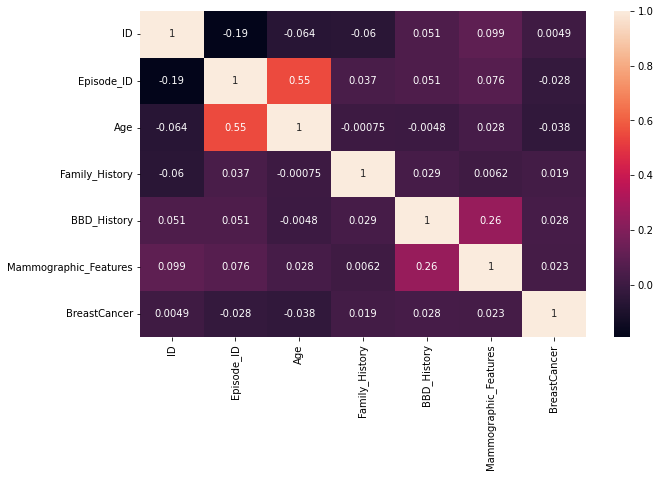

In [59]:
# Data correlation
cor = data.corr()

plt.figure(figsize = (10, 6))
sns.heatmap(cor, annot = True)

Estas serán las variables finales con las que trabajaremos

### 2.3.4 Relationship between dependant and independant variables

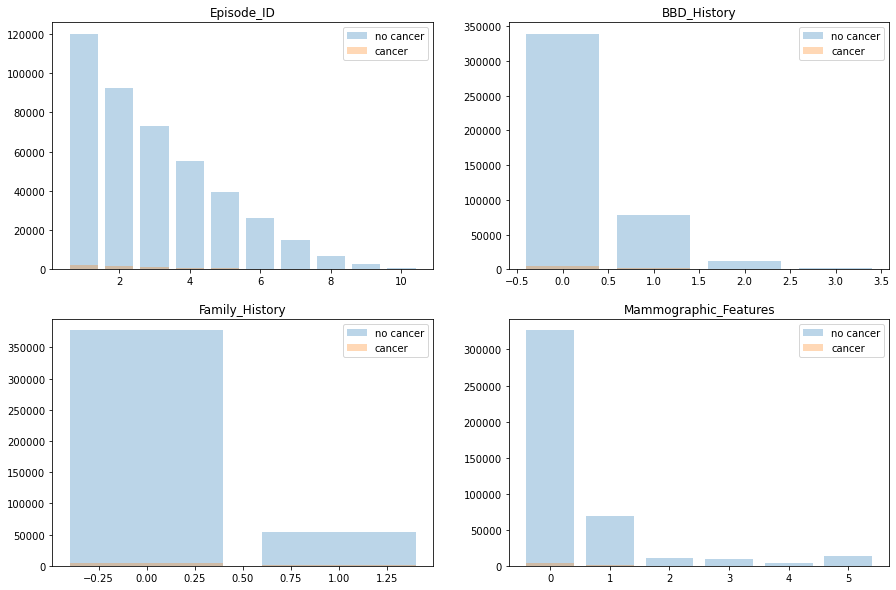

In [71]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))

ax[0, 0].bar(data[data['BreastCancer'] == 0]['Episode_ID'].value_counts().index, 
          data[data['BreastCancer'] == 0]['Episode_ID'].value_counts(), alpha=0.3, label='no cancer')
ax[0, 0].bar(data[data['BreastCancer'] == 1]['Episode_ID'].value_counts().index, 
          data[data['BreastCancer'] == 1]['Episode_ID'].value_counts(), alpha=0.3, label='cancer')
ax[1, 0].bar(data[data['BreastCancer'] == 0]['Family_History'].value_counts().index, 
          data[data['BreastCancer'] == 0]['Family_History'].value_counts(), alpha=0.3, label='no cancer')
ax[1, 0].bar(data[data['BreastCancer'] == 1]['Family_History'].value_counts().index, 
          data[data['BreastCancer'] == 1]['Family_History'].value_counts(), alpha=0.3, label='cancer')
ax[0, 1].bar(data[data['BreastCancer'] == 0]['BBD_History'].value_counts().index, 
          data[data['BreastCancer'] == 0]['BBD_History'].value_counts(), alpha=0.3, label='no cancer')
ax[0, 1].bar(data[data['BreastCancer'] == 1]['BBD_History'].value_counts().index, 
          data[data['BreastCancer'] == 1]['BBD_History'].value_counts(), alpha=0.3, label='cancer')
ax[1, 1].bar(data[data['BreastCancer'] == 0]['Mammographic_Features'].value_counts().index, 
          data[data['BreastCancer'] == 0]['Mammographic_Features'].value_counts(), alpha=0.3, label='no cancer')
ax[1, 1].bar(data[data['BreastCancer'] == 1]['Mammographic_Features'].value_counts().index, 
          data[data['BreastCancer'] == 1]['Mammographic_Features'].value_counts(), alpha=0.3, label='cancer')

ax[0, 0].set_title('Episode_ID')
ax[1, 0].set_title('Family_History')
ax[0, 1].set_title('BBD_History')
ax[1, 1].set_title('Mammographic_Features')

ax[0, 0].legend()
ax[1, 0].legend()
ax[0, 1].legend()
ax[1, 1].legend()

plt.show()

# 4. Other visualizations

For the next visualizations we have choosen the information from the last episode for each women

In [60]:
# Clone original dataset
df = data

# Group dataset by ID
df = df.groupby(['ID']).agg(list)

# Convert pd dataframe to np array
df_np = df.to_numpy()

# Function to parsed np array (rows) 
def parseRows(row):
    patient_length = len(row[0])
    parsed_row = [x[patient_length - 1] for x in row]
    return parsed_row
    
parsed_np = np.apply_along_axis(parseRows, axis = 1, arr = df_np)

# Convert np array to pd dataframe
df_converted = pd.DataFrame(parsed_np, columns = ['episode','age','time1', 'time2', 'time_total', 'family_history',
                                                 'bbd_history', 'mammographic_features', 'breast_cancer'])

  
# Remove column 'time1', 'time2'
df_converted = df_converted.drop(['time1', 'time2'], axis = 1)

df_converted.head(10)

,episode,age,time_total,family_history,bbd_history,mammographic_features,breast_cancer
0,7,68,"13,96",0,1,0,0
1,3,67,"5,73",0,1,0,0
2,2,61,"4,03",0,0,0,0
3,5,68,"9,87",0,0,0,0
4,6,61,"12,15",0,1,0,0
5,6,61,"11,93",0,1,1,0
6,4,67,"7,97",1,0,0,0
7,6,61,"12,15",1,0,0,0
8,6,61,"12,16",0,0,0,0
9,4,61,"10,15",0,1,0,0


Text(0.5, 1.0, 'Cancer - Family_history')

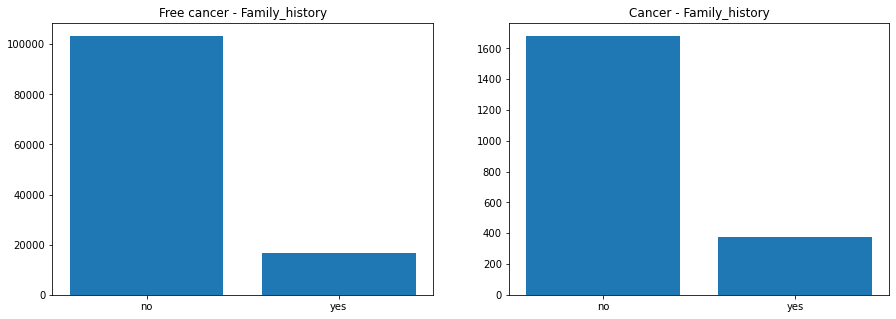

In [62]:
# Comparativa Family_History mujere sin cáncer, Family_History mujeres con cáncer
freq_negative = df_converted[df_converted['breast_cancer'] == '0']['family_history'].value_counts()
freq_positive = df_converted[df_converted['breast_cancer'] == '1']['family_history'].value_counts()

# freq = df_converted['breast_cancer'].value_counts()

fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].bar(freq_negative.index.values, freq_negative)
ax[1].bar(freq_positive.index.values, freq_positive)

ax[0].set_xticks(freq_negative.index.values, ('no', 'yes'))
ax[1].set_xticks(freq_positive.index.values, ('no', 'yes'))

ax[0].set_title('Free cancer - Family_history')
ax[1].set_title('Cancer - Family_history')

# plt.savefig('./img/family_history_comparative.png')

Text(0.5, 1.0, 'Cancer - BBD_history')

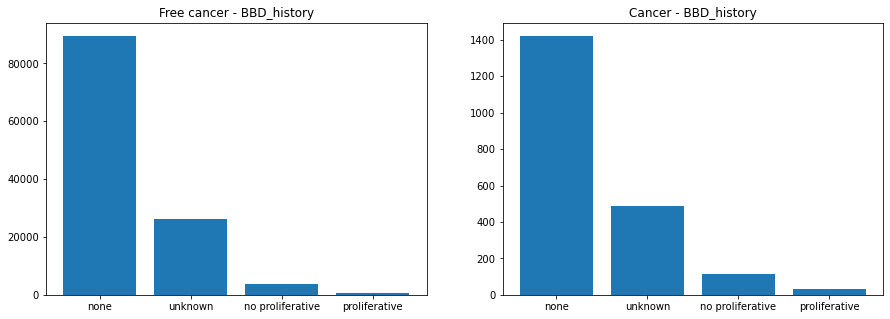

In [63]:
# Comparativa BBD_History mujere sin cáncer, BBD_History mujeres con cáncer
freq_negative = df_converted[df_converted['breast_cancer'] == '0']['bbd_history'].value_counts()
freq_positive = df_converted[df_converted['breast_cancer'] == '1']['bbd_history'].value_counts()

# freq = df_converted['breast_cancer'].value_counts()

fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].bar(freq_negative.index.values, freq_negative)
ax[1].bar(freq_positive.index.values, freq_positive)

ax[0].set_xticks(freq_negative.index.values, ('none', 'unknown', 'no proliferative', 'proliferative'))
ax[1].set_xticks(freq_positive.index.values, ('none', 'unknown', 'no proliferative', 'proliferative'))

ax[0].set_title('Free cancer - BBD_history')
ax[1].set_title('Cancer - BBD_history')

# plt.savefig('./img/bbd_history_comparative.png')

Text(0.5, 1.0, 'Cancer - Mammographic_Features')

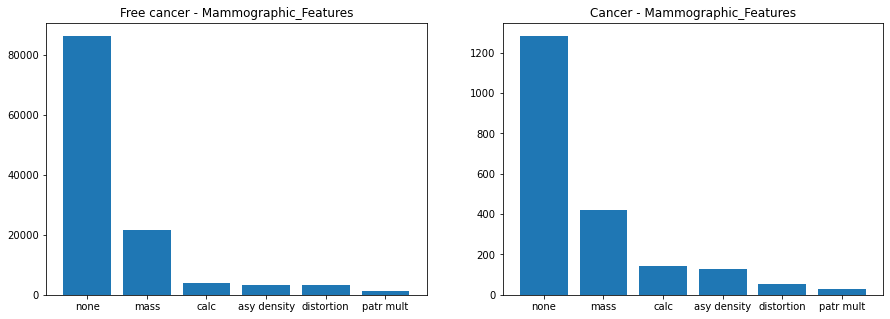

In [64]:
# Comparativa Mammographic_Features mujere sin cáncer, Mammographic_Features mujeres con cáncer
freq_negative = df_converted[df_converted['breast_cancer'] == '0']['mammographic_features'].value_counts()
freq_positive = df_converted[df_converted['breast_cancer'] == '1']['mammographic_features'].value_counts()

# freq = df_converted['breast_cancer'].value_counts()

fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].bar(freq_negative.index.values, freq_negative)
ax[1].bar(freq_positive.index.values, freq_positive)

ax[0].set_xticks(freq_negative.index.values, ('none', 'mass', 'calc',
                                              'asy density', 'distortion', 'patr mult'))
ax[1].set_xticks(freq_positive.index.values, ('none', 'mass', 'calc',
                                              'asy density', 'distortion', 'patr mult'))

ax[0].set_title('Free cancer - Mammographic_Features')
ax[1].set_title('Cancer - Mammographic_Features')

# plt.savefig('./img/mammographic_features_comparative.png')